<a href="https://colab.research.google.com/github/bankawat1/LDA/blob/main/Latent_Drichellet_Alloc_fewer_classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [1]:
!pip install en_core_web_sm

In [2]:
import pandas as pd
import numpy as np

Fetch Text dataset

In [28]:
from sklearn.datasets import fetch_20newsgroups

nwtrain = fetch_20newsgroups(subset='all',shuffle=True, \
                             random_state=42,remove=('headers', 'footers', 'quotes'), \
                             categories=['talk.politics.guns','comp.graphics','rec.autos','sci.med'])

In [29]:
# nwtrain.data

In [30]:
nwtrain_ = [(data,target) for data, target in zip(nwtrain.data, nwtrain.target) if not len(data.split()) < 10]

In [31]:
nwtrain_data = np.array(nwtrain_)[:,0]

In [32]:
nwtrain_target = np.array(nwtrain_)[:,1]

Plot target distribution

In [33]:

nwtrain_data.__len__()

3634

In [34]:
tnames = pd.Series(nwtrain.target_names)
tnames

0         comp.graphics
1             rec.autos
2               sci.med
3    talk.politics.guns
dtype: object

/usr/local/lib/python3.10/dist-packages/numpy/core/numeric.py:2463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())
<ipython-input-35-539d8c87c195>:1: FutureWarning: Values are too large to be losslessly cast to int64. In a future version this will raise OverflowError. To retain the old behavior, use pd.Series(values).astype(int64)
  pd.Series(nwtrain_target,dtype=int).map(tnames).value_counts().plot.barh()


<Axes: >

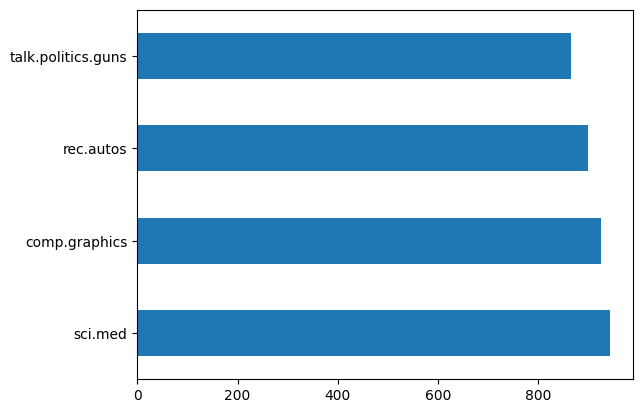

In [35]:
pd.Series(nwtrain_target,dtype=int).map(tnames).value_counts().plot.barh()

Dataset samples

In [63]:
nwtrain_data[0]

"Looking for a graphics/CAD/or-whatever package on a X-Unix box that will\ntake a file with records like:\n\nn  a  b  p\n\nwhere n = a count  - integer \n      a = entity a - string\n      b = entity b - string\n      p = type     - string\n\nand produce a networked graph with nodes represented with boxes or circles\nand the vertices represented by lines and the width of the line determined by\nn.  There would be a different line type for each type of vertice. The boxes\nneed to be identified with the entity's name.  The number of entities < 1000\nand vertices < 100000.  It would be nice if the tool minimized line\ncross-overs and did a good job of layout.  ;-)\n\n  I have looked in the FAQ for comp.graphics and gnuplot without success. Any\nideas would be appreciated?\n\nThanks,"

In [64]:
nwtrain_target[0]

'0'

select small dataset

In [37]:
nwtrain_data = nwtrain_data #nwtrain.data[:1000]

Preprocess the data

In [38]:
import spacy

In [39]:
pd.set_option('max_colwidth',400)

In [40]:
en = spacy.load('en_core_web_sm')


stop words




In [41]:
import re
print(en.Defaults.stop_words.__len__())
stopwords = en.Defaults.stop_words
stopwords.update({'{','}','[',']','(',')'})
print(stopwords)

326
{'therein', 'herself', 're', "'d", '‘re', 'back', 'yet', '’d', 'please', 'many', 'whatever', 'in', 'off', 'even', 'seems', 'with', 'everything', 'six', 'at', 'some', 'almost', 'before', 'itself', 'take', 'whither', 'third', 'her', 'one', 'will', 'being', 'whenever', 'is', 'i', 'thence', 'up', 'unless', 'anyway', '{', 'these', 'every', "'re", 'below', 'cannot', 'ever', 'any', 'enough', 'were', 'whose', 'a', 'neither', 'everywhere', '}', 'always', 'been', 'afterwards', 'namely', 'you', 'much', 'over', 'put', 'ours', 'without', 'side', 'whoever', 'those', 'we', 'here', 'often', 'perhaps', 'somehow', 'thereby', 'himself', 'nowhere', 'or', 'several', 'by', 'yours', 'per', 'such', 'bottom', '‘d', 'top', 'quite', 'everyone', 'no', 'to', 'get', 'moreover', ']', 'yourself', 'throughout', 'nevertheless', 'few', 'so', 'latterly', 'ourselves', 'more', 'though', 'must', 'beside', 'thru', 'wherever', '‘m', 'for', 'due', 'now', 'beyond', 'meanwhile', 'together', 'hereby', 'see', 'where', 'n’t', '

In [42]:
def pre_process_text(text):
  #lower
  text = text.lower()

  #tokenize
  token_list = [str(val) for val in en.tokenizer(text)]

  #remove stopwords
  token_list = [word for word in token_list if word not in stopwords]

  #remove words < 3 character
  token_list = [word for word in token_list if not len(word) < 3]

  #remove non-alpha numeric characters
  token_list = [re.sub(r"\W", ' ', val).strip() for val in token_list]
  token_list = [val for val in token_list if val != ""]
  merged_text = ' '.join(token_list)

  #lemmatize
  token_list = [word.lemma_ for word in en(merged_text) ]  #TODO: lemmatizer converting 'is' to 'be'.

  #remove words < 3 character
  token_list = [word for word in token_list if not len(word) < 3]

  return token_list


In [43]:
df = pd.Series(nwtrain_data).apply(lambda x:  pre_process_text(x))

In [44]:
df.head()

0    [look, graphic, cad, package, unix, box, file, record, like, count, integer, entity, string, entity, string, type, string, produce, network, graph, node, represent, box, circle, vertice, represent, line, width, line, determine, different, line, type, type, vertice, box, need, identify, entity, number, entity, 1000, vertice, 100000, nice, tool, minimize, line, cross, over, good, job, layout, lo...
1    [immediate, release, editorial, contact, single, source, marketing, myra, manahan, 714, 545, 1338, genoa, systems, joseph, brunoli, 408, 432, 9090, neil, roehm, 408, 432, 9090, technical, genoa, present, high, performance, video, graphic, accelerator, san, jose, calif, usa, genoa, systems, corporation, announce, windowsvga, true, color, bit, graphic, accelerator, card, deliver, million, color,...
2    [utah, raster, toolkit, getx11, convert, sun, raster, file, presumably, ppm, pbm, toolkit, convert, ppm, utah, rle, format, ppmtorle, provide, toolkit, remember, xloadimage, bit, server

Applying LDA

In [45]:
import gensim

In [46]:
dictnry = gensim.corpora.Dictionary(df)
dictnry.filter_extremes(no_above=0.7)


In [47]:
# remove empty tokens
bad_keys = []
for key,val in dictnry.items():
  if val.isspace():
    print(key, val)
    bad_keys.append(key)
dictnry.filter_tokens(bad_ids=bad_keys)

5596     
6367    


In [48]:
print(f"length of dict: {dictnry.items().__len__()}")
# bow

length of dict: 6386


In [49]:
bow = [dictnry.doc2bow(doc) for doc in df]

In [77]:
NUM_OF_TOPICS = 4

In [73]:

lda_model =  gensim.models.LdaMulticore(bow,
                                   num_topics = NUM_OF_TOPICS,
                                   id2word = dictnry,
                                   passes = 10,
                                   workers = 2)

In [ ]:
[dictnry.id2token[val[0]] for val in bow[0]]

In [ ]:
# # dictnry.id2token[1]
# for item in dictnry.items():
#   print(item)
#   if item[0] == 10:
#     break

In [ ]:
# lda_model.get_topics().shape
# len(bow),bow[0]

In [ ]:
# lda_model.get_document_topics(bow=bow[15])

In [ ]:
# lda_model.get_topic_terms(0, topn=None).__len__()

In [96]:
for i in range(NUM_OF_TOPICS):
  print([word for word, prob in lda_model.show_topic(i,topn=40)])
# lda_model.id2word

['car', 'know', 'like', 'think', 'good', 'look', 'new', 'problem', 'time', 'drive', 'engine', 'year', 'want', 'get', 'buy', 'work', 'thing', 'come', 'speed', 'question', 'auto', 'find', 'well', 'right', 'way', 'use', 'people', 'thank', 'tell', 'say', 'point', 'post', 'price', 'oil', 'need', 'try', 'lot', 'long', 'dealer', 'change']
['people', 'gun', 'know', 'think', 'time', 'like', 'good', 'say', 'fire', 'cause', 'day', 'thing', 'right', 'year', 'find', 'use', 'problem', 'fbi', 'way', 'law', 'doctor', 'come', 'try', 'believe', 'get', 'want', 'tell', 'weapon', 'government', 'patient', 'need', 'start', 'food', 'kill', 'point', 'child', 'effect', 'work', 'take', 'hear']
['gun', 'file', 'disease', 'health', '1993', 'number', 'year', 'use', 'state', 'firearm', 'hiv', 'cancer', 'medical', 'right', 'study', 'new', 'control', 'research', 'patient', 'page', 'report', 'april', 'national', 'rate', 'center', 'law', 'information', 'people', 'include', 'university', 'public', 'states', 'high', 'case

In [ ]:
lda_model.show_topic(0,topn=40)



```
# This is formatted as code
```
lda_model.get_document_topics(bow[0])
[(8, 0.17350385), (16, 0.79686207)]

In [79]:
lda_model.get_document_topics(bow[0])

[(0, 0.11732056), (3, 0.8740318)]

In [ ]:
#previous code
#lda_model.get_document_topics(bow[0])

## Word2Vec

In [80]:
import gensim
from gensim.models import Word2Vec

In [81]:
# Word2Vec()
# from gensim.test.utils import common_texts

In [82]:
# model = Word2Vec(sentences=common_texts, vector_size=100, window=5, min_count=1, workers=4)

training for Phrases

In [ ]:
# from gensim.models import Phrases
# bigram_transformer = Phrases(common_texts)
# bb = bigram_transformer[common_texts]

using Pretrained Word2Vec

In [55]:
import gensim.downloader as gdl

In [59]:
model= gdl.load('fasttext-wiki-news-subwords-300')

[==================================================] 100.0% 958.5/958.4MB downloaded


In [57]:
from gensim.models import KeyedVectors
model = KeyedVectors.load('fasttext-300.wordvectors')
# model.save('fasttext-300.wordvectors')
# saved_model = model.load('fasttext-300.wordvectors')

# saved_model['banking'].shape
# gdl.info()['models']['fasttext-wiki-news-subwords-300']
# gendownld.info()['models']['glove-wiki-gigaword-300']

FileNotFoundError: ignored

In [83]:
#model testing code...
model['dog'].shape

(300,)

## Compare for similarity between topics

In [ ]:
# [dictnry.id2token[val[0]] for val in bow[0]]

In [85]:

def get_word_vector(word: str):
  try:
    return model[word]
  except KeyError:
    print(f"{word} not found in dictionary")
    return np.zeros(300,)

def find_mean_embed_of_topic(topic_idx: int):
    topic_words_list = [dictnry.id2token[val[0]] for val in lda_model.get_topic_terms(topic_idx,topn=20)]
    topic_embed = [get_word_vector(val) for val in topic_words_list]
    mean_embed = np.array(topic_embed).mean(axis=0)
    print(mean_embed.shape)
    return mean_embed

In [86]:
X = []
for i in range(NUM_OF_TOPICS):
  X.append(find_mean_embed_of_topic(i))
X = np.array(X)
X.shape

(300,)
(300,)
(300,)
(300,)


(4, 300)

In [67]:
# xt = np.arange(24).reshape(6,4)
# xt = np.random.random((6,4))
# xt.tofile('test_file')
# # X.tofile('Xref_embeddings')
# xt

In [68]:
# xt_rec = np.fromfile('test_file')
# xt_rec.reshape(6,4)

Load Previous Topics embeddings

In [ ]:
x_ref = np.fromfile('Xref_embeddings')
print(x_ref.shape)
x_ref = x_ref.reshape(18,300)
x_ref.shape

(5400,)


(18, 300)

In [87]:
from sklearn.metrics.pairwise import cosine_similarity
def find_cosine_sim(X, Y):
  if len(X.shape) == 1:
    X = X[np.newaxis,...]
  if len(Y.shape) == 1:
    Y = Y[np.newaxis,...]

  return cosine_similarity(X, Y)

Plot heatmap

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: >

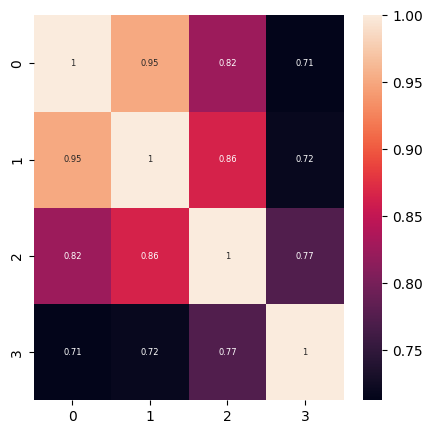

In [90]:
plt.figure(figsize=((5,5)))
sim_matrix = find_cosine_sim(X,X)
sns.heatmap(sim_matrix,annot=True,annot_kws={"fontsize":6})